In [35]:
# Import measure related functions
from spiketools.measures.spikes import (compute_firing_rate, compute_isis,
                                        compute_cv, compute_fano_factor)
from spiketools.measures.conversions import (convert_times_to_train, convert_train_to_times,
                                             convert_isis_to_times)
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.data import plot_lines
# Import simulation functions
from spiketools.sim import sim_spiketimes

# Import plot functions
from spiketools.plts.spikes import plot_isis
from spiketools.plts.trials import plot_rasters
from fooof.plts import plot_spectra

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import warnings
warnings.filterwarnings("ignore")



In [59]:
cd 'Cz/'

/home/b1044271/Columbia/Results/PSDs/Cz


In [60]:
# folder of the results
#path_files = Path('/home/b1044271/Columbia/Results/PSDs/New_freq_Res/E257')
path_files = Path('/home/b1044271/Columbia/Results/PSDs/Cz')


# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

In [61]:
# a function to generate freq files
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file          

In [62]:
# get frequencies for all dimensions (x axis).
path_freqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')
f_files = list(path_freqs.iterdir())
f_files = sorted(f_files)

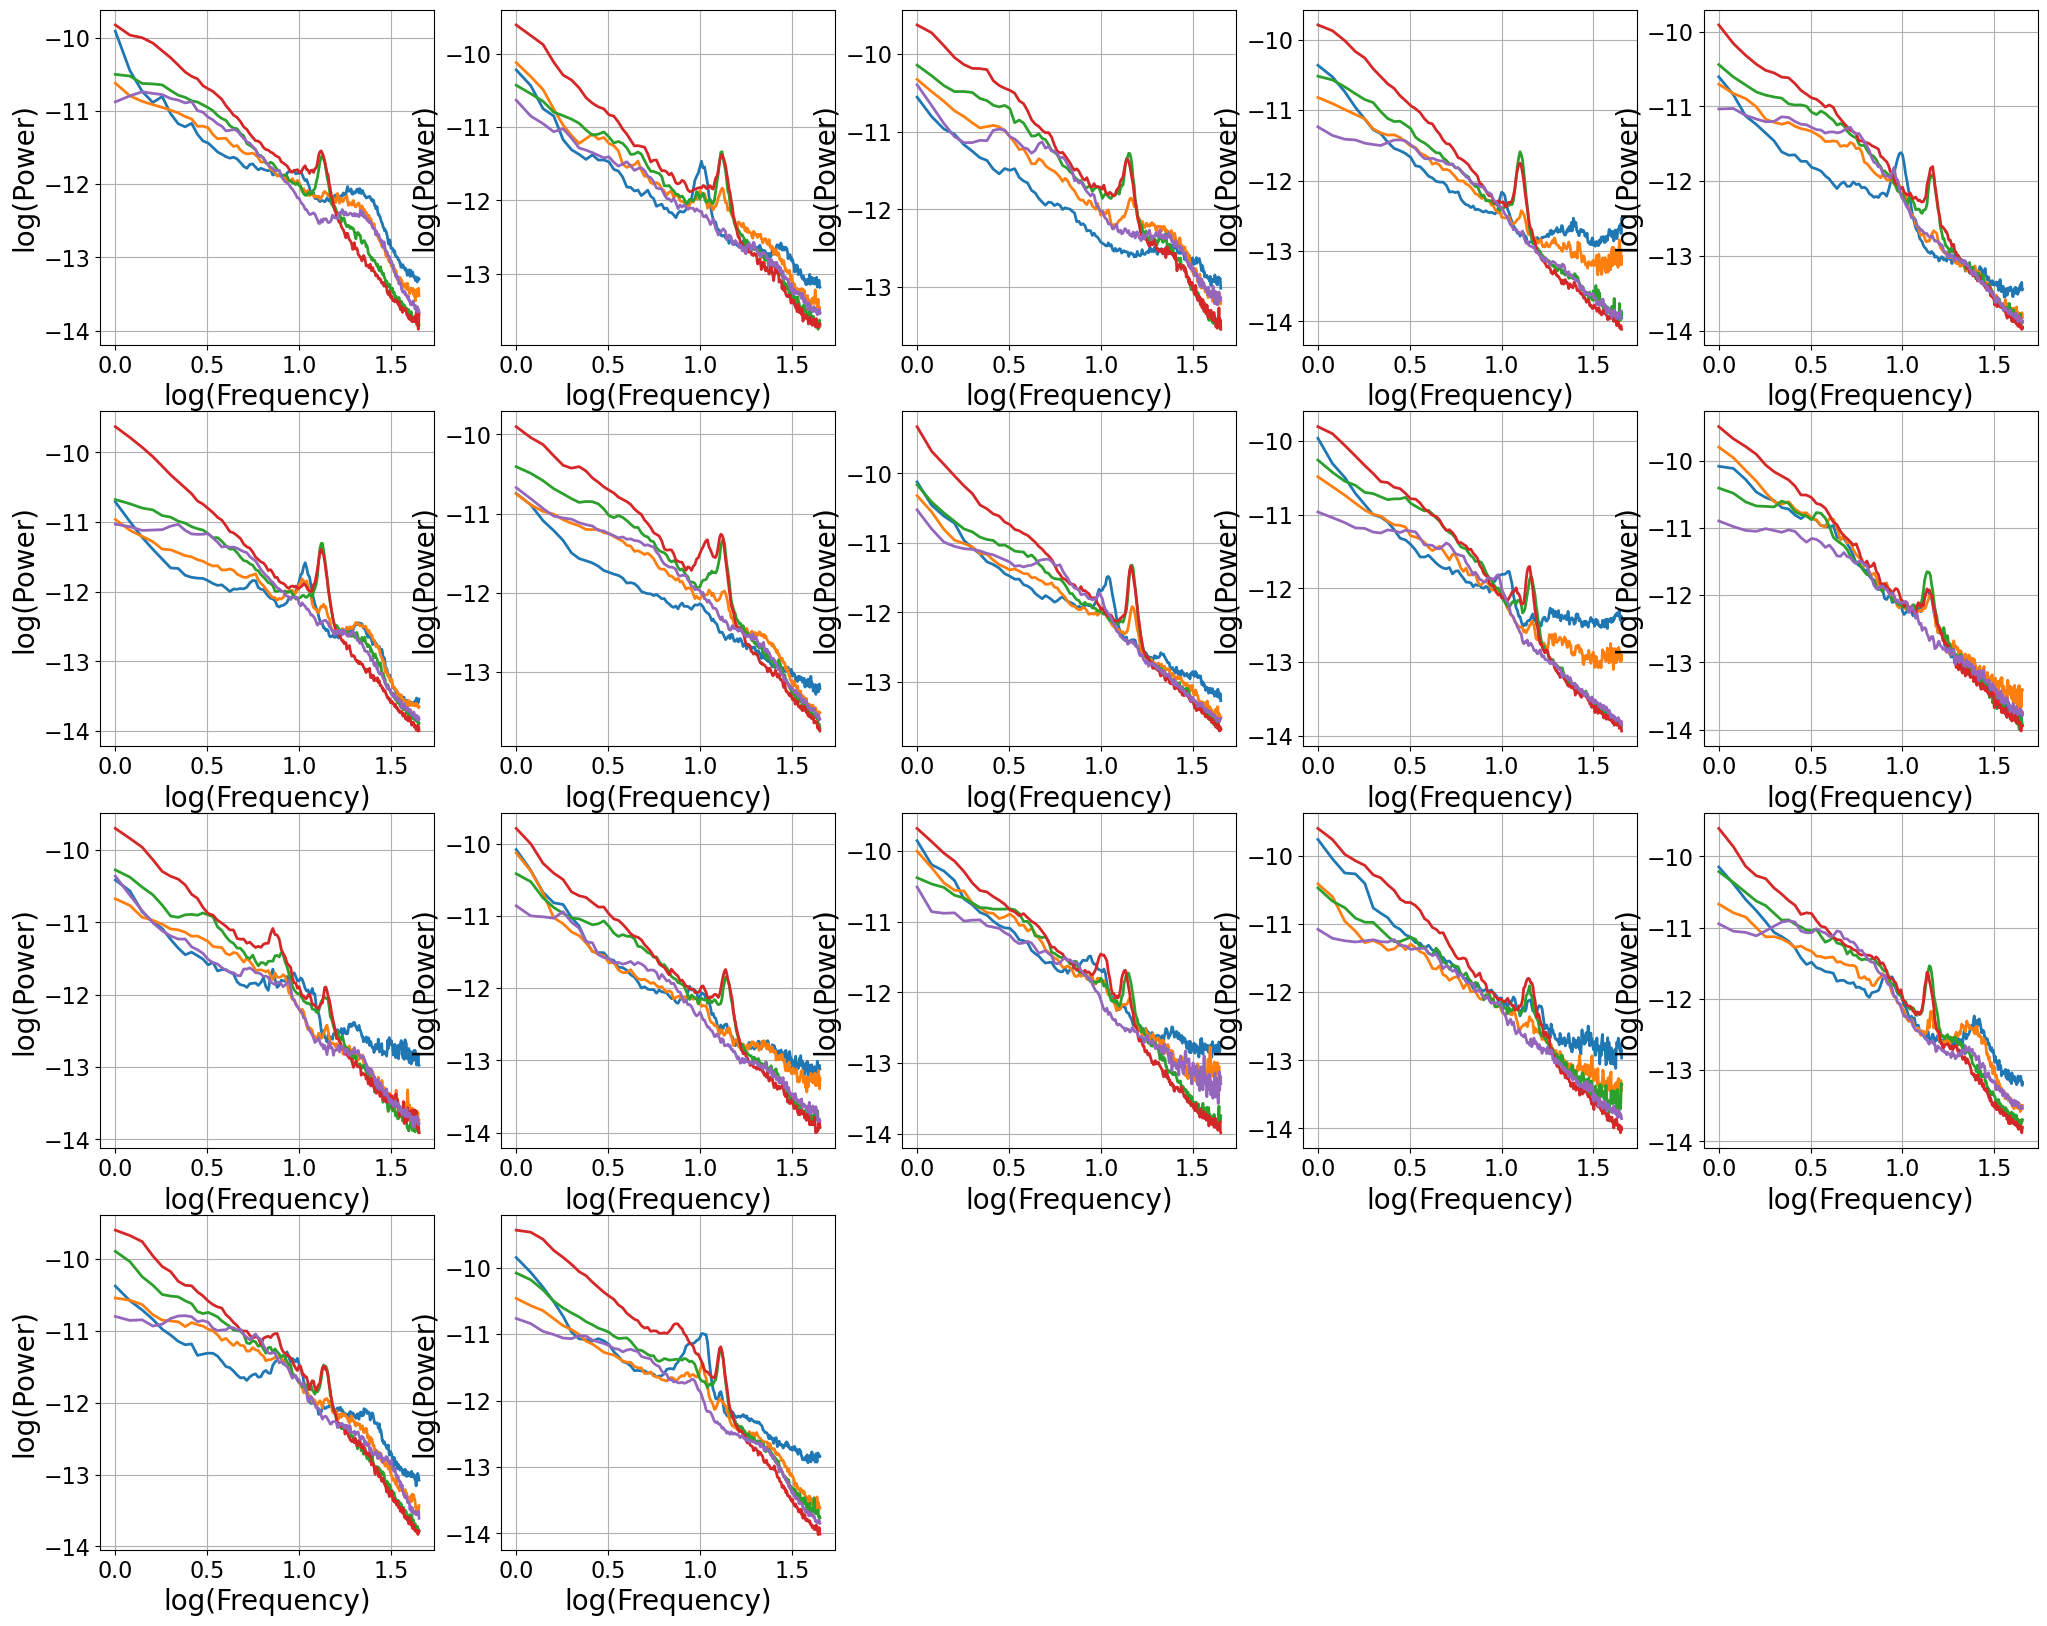

In [73]:
N1_psd={}
N2_psd={}
N3_psd={}
AW_psd={}
RM_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(25, 20)))


i = 0
freqs_d = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))
freqs_d=freqs_d[4:]
for subj in sbj_folders:  
    N1s = np.load(path_files / subj / 'N1' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N2s = np.load(path_files / subj /'N2' / (T_PARAM + '_' + F_PARAM + '.npy'))
    N3s = np.load(path_files / subj /'N3' / (T_PARAM + '_' + F_PARAM + '.npy'))
    AWs = np.load(path_files / subj /'AW' / (T_PARAM + '_' + F_PARAM + '.npy'))
    RMs = np.load(path_files / subj /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(N1s),len(N2s),len(N3s),len(AWs),len(RMs)])
    
    N1_psd[i] = np.mean(N1s[np.random.choice(len(N1s), size=epoch_no, replace=False),:],0)
    N2_psd[i] = np.mean(N2s[np.random.choice(len(N2s), size=epoch_no, replace=False),:],0)
    N3_psd[i] = np.mean(N3s[np.random.choice(len(N3s), size=epoch_no, replace=False),:],0)
    AW_psd[i] = np.mean(AWs[np.random.choice(len(AWs), size=epoch_no, replace=False),:],0)
    RM_psd[i] = np.mean(RMs[np.random.choice(len(RMs), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
lN1 = list(iter(N1_psd.values())) #convert values to list
lN2 = list(iter(N2_psd.values())) #convert values to list
lN3 = list(iter(N3_psd.values())) #convert values to list
lAW = list(iter(AW_psd.values())) #convert values to list
lRM = list(iter(RM_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[lAW[S],lN1[S],lN2[S],lN3[S],
        lRM[S]], log_freqs=True, log_powers=True, ax=next(axes))
 

#plt.savefig("Group_PSDs_Trial2_Cz2.svg", dpi = 600 )

In [72]:
freqs_d[4:]

array([ 1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,
        4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,
        6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,
        8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4,
       10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6,
       12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8,
       15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. ,
       17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2,
       19.4, 19.6, 19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4,
       21.6, 21.8, 22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6,
       23.8, 24. , 24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8,
       26. , 26.2, 26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. ,
       28.2, 28.4, 28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30. , 30.2,
       30.4, 30.6, 30.8, 31. , 31.2, 31.4, 31.6, 31

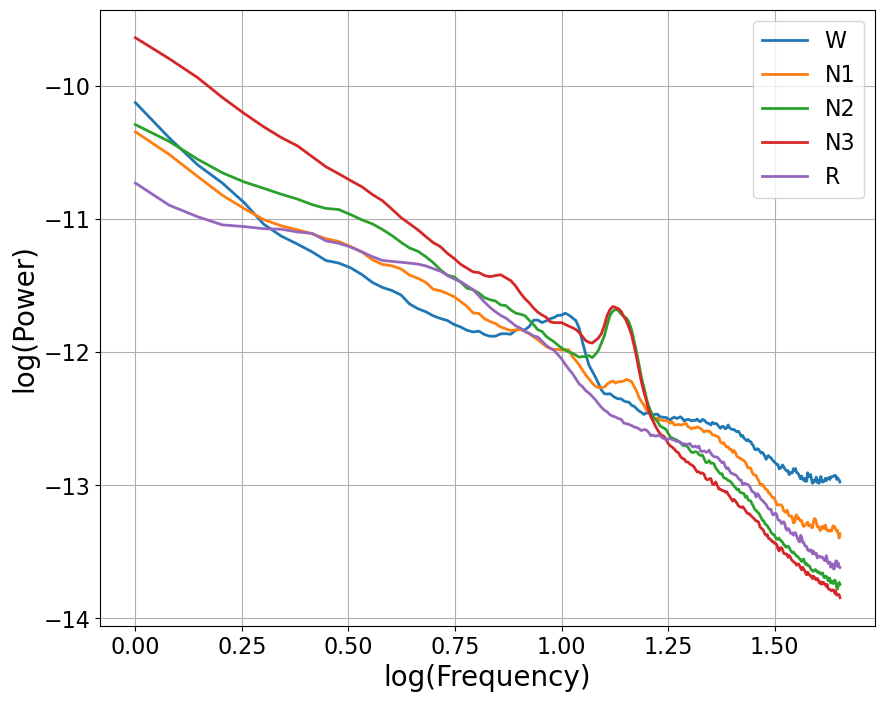

In [74]:
plot_spectra(freqs_d,[np.mean(lAW,axis=0),np.mean(lN1,axis=0),np.mean(lN2,axis=0),np.mean(lN3,axis=0),
        np.mean(lRM,axis=0)], log_freqs=True, log_powers=True, labels =['W','N1','N2','N3','R'])
#plt.savefig("GroupAv_PSDs_Cz.svg", dpi = 600 )

In [9]:
# folder of the results
path_folders = Path('/home/b1044271/Columbia/Results/PSDs/Pz')
path_files   = Path('/home/b1044271/Columbia/Results/PSDs')

# Get names of all subject folder
sbj_folders = list(path_folders.iterdir())
sbj_folders = sorted(sbj_folders)

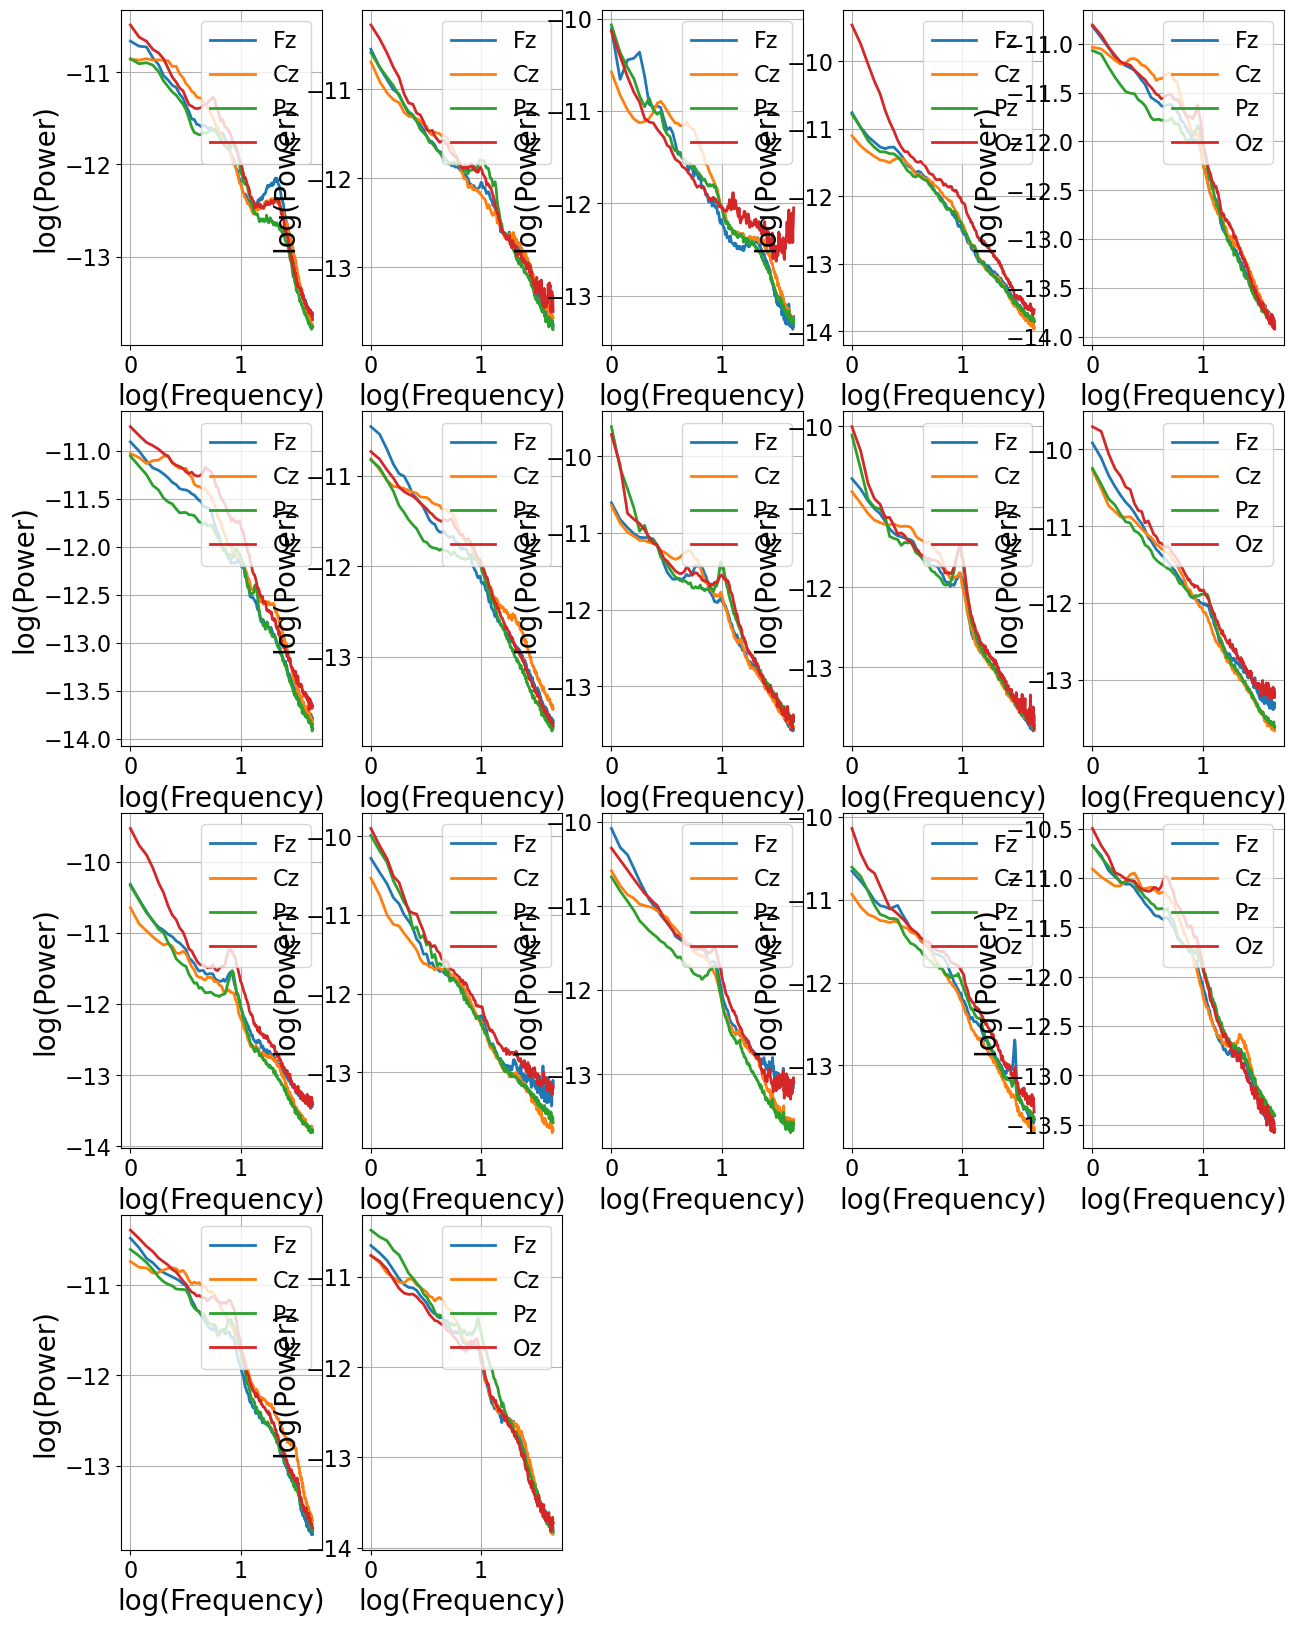

In [13]:
L1_psd={}
L2_psd={}
L3_psd={}
L4_psd={}

F_PARAM = 'F45'
T_PARAM = 'T5'
axes = iter(make_axes(17, 5, figsize=(15, 20)))


freqs_d = np.load((path_freqs/(T_PARAM + F_PARAM + '_freqres.npy')))

i = 0
for subj in sbj_folders:  
    L1 = np.load(path_files / 'Fz' /os.path.basename(subj) / 'RM'/ (T_PARAM + '_' + F_PARAM + '.npy'))
    L2 = np.load(path_files / 'Cz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L3 = np.load(path_files / 'Pz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    L4 = np.load(path_files / 'Oz' /os.path.basename(subj) /'RM' / (T_PARAM + '_' + F_PARAM + '.npy'))
    
    epoch_no = min([len(L1),len(L2),len(L3),len(L4)])
    
    L1_psd[i] = np.mean(L1[np.random.choice(len(L1), size=epoch_no, replace=False),:],0)
    L2_psd[i] = np.mean(L2[np.random.choice(len(L2), size=epoch_no, replace=False),:],0)
    L3_psd[i] = np.mean(L3[np.random.choice(len(L3), size=epoch_no, replace=False),:],0)
    L4_psd[i] = np.mean(L4[np.random.choice(len(L4), size=epoch_no, replace=False),:],0)
    i = i+1
    
      # mean over all subjects per condition
loc1 = list(iter(L1_psd.values())) #convert values to list
loc2 = list(iter(L2_psd.values())) #convert values to list
loc3 = list(iter(L3_psd.values())) #convert values to list
loc4 = list(iter(L4_psd.values())) #convert values to list
    
for S in np.arange(len(lN1)):

    plot_spectra(freqs_d,[loc1[S],loc2[S],loc3[S],loc4[S]
        ], log_freqs=True, log_powers=True, ax=next(axes), labels=['Fz','Cz','Pz','Oz'])

plt.savefig("Group_PSDs_Locations_Cz2.svg", dpi = 600 )

In [161]:
path_files / 'Fz' /os.path.basename(subj) / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Pz/Fz/VP01/RM/T5_F45.npy')

In [170]:
plot_spectra?

In [142]:
path_files / 'Fz' /subj / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/RM/T5_F45.npy')

In [139]:
path_files / 'Fz' /subj / 'RM' / (T_PARAM + '_' + F_PARAM + '.npy')

PosixPath('/home/b1044271/Columbia/Results/PSDs/Pz/VP19/RM/T5_F45.npy')

In [133]:
np.shape(np.mean(L1[np.random.choice(len(N1s), size=epoch_no, replace=False),:],0))

(221,)

In [136]:
loc1


[array([1.39760436e-11, 1.23704017e-11, 1.26813180e-11, 1.19466558e-11,
        1.01582867e-11, 8.04296387e-12, 6.97260789e-12, 6.11486579e-12,
        5.65751252e-12, 5.01004995e-12, 4.51714190e-12, 3.90864644e-12,
        3.15329955e-12, 2.53843803e-12, 2.21852672e-12, 2.16521239e-12,
        2.09392549e-12, 2.10886015e-12, 2.23208207e-12, 2.17232165e-12,
        2.19453824e-12, 2.29066211e-12, 2.35298948e-12, 2.41953508e-12,
        2.36996116e-12, 2.25406057e-12, 2.10389057e-12, 1.97557598e-12,
        1.82978639e-12, 1.73452883e-12, 1.65699790e-12, 1.57679951e-12,
        1.54493031e-12, 1.48690058e-12, 1.44955566e-12, 1.43169619e-12,
        1.59440991e-12, 1.73059638e-12, 1.62152334e-12, 1.62698578e-12,
        1.46090329e-12, 1.37512905e-12, 1.31204247e-12, 1.18194401e-12,
        9.89293506e-13, 8.29749676e-13, 7.83109030e-13, 7.34237010e-13,
        6.51464517e-13, 6.29207224e-13, 6.06156085e-13, 6.35218422e-13,
        6.34926770e-13, 5.45043654e-13, 4.96647143e-13, 4.725123

In [41]:
WA_m = np.mean(lAW,axis=0)
RM_m = np.mean(lRM,axis=0)
N1_m = np.mean(lN1,axis=0)
N2np.mean(lAW,axis=0)

array([3.04412560e-09, 6.15750090e-10, 1.40007081e-10, 6.24051753e-11,
       3.19792646e-11, 1.95958619e-11, 1.35448678e-11, 1.11841453e-11,
       8.46887966e-12, 6.03008868e-12, 5.22346185e-12, 4.70099212e-12,
       4.11647014e-12, 3.69626969e-12, 3.23411136e-12, 3.25861689e-12,
       2.88016158e-12, 2.71340537e-12, 2.44583284e-12, 2.25956625e-12,
       2.02350986e-12, 2.01007265e-12, 1.79591619e-12, 1.65756300e-12,
       1.62173746e-12, 1.51222999e-12, 1.52202190e-12, 1.44879235e-12,
       1.35193100e-12, 1.29653800e-12, 1.32304585e-12, 1.30383681e-12,
       1.25805114e-12, 1.17146057e-12, 1.15804070e-12, 1.17698682e-12,
       1.17018994e-12, 1.22441779e-12, 1.28961219e-12, 1.30286933e-12,
       1.36086081e-12, 1.44161330e-12, 1.56372935e-12, 1.63937068e-12,
       1.55818845e-12, 1.60048005e-12, 1.59871688e-12, 1.54287934e-12,
       1.61884516e-12, 1.61347794e-12, 1.74086421e-12, 1.83797062e-12,
       1.65525138e-12, 1.51076651e-12, 1.32080487e-12, 1.12047634e-12,
      

In [138]:
plt.plot(freqs_d,np.mean(lAW,axis=0),  color ='black', label='W',linewidth=3)
plt.fill_between(freqs_d, s_counts1-s_sem1, s_counts1+s_sem1,facecolor='dodgerblue', alpha=0.25)


,np.mean(lN1,axis=0),np.mean(lN2,axis=0),np.mean(lN3,axis=0),
        np.mean(lRM,axis=0)], log_freqs=True, log_powers=True, labels =['W','N1','N2','N3','R'])


array([[3.62127678e-11, 5.70453342e-11, 7.76105011e-11, ...,
        9.19970932e-15, 9.08488992e-15, 1.95630503e-14],
       [5.59234690e-11, 3.16656420e-11, 1.97627592e-11, ...,
        1.40878743e-14, 7.58171484e-15, 7.39431629e-15],
       [3.25623348e-11, 6.42956035e-11, 7.04526196e-11, ...,
        1.40370378e-14, 1.24200544e-14, 1.33675818e-14],
       ...,
       [2.26202446e-11, 3.23492613e-11, 2.50977355e-11, ...,
        1.70190459e-14, 1.91064740e-14, 1.11466105e-14],
       [7.19755969e-11, 2.85442039e-11, 2.32399246e-11, ...,
        1.12772423e-14, 2.59517734e-14, 1.11167183e-14],
       [2.66620854e-11, 1.30577810e-11, 1.55729707e-11, ...,
        2.11412213e-14, 1.39846332e-14, 2.12101844e-14]])

In [43]:
np.shape(lRM[0])

(225,)

In [89]:
cd 'Aperiodic_sleep/Notebooks/'

/home/b1044271/Columbia/Aperiodic_sleep/Notebooks


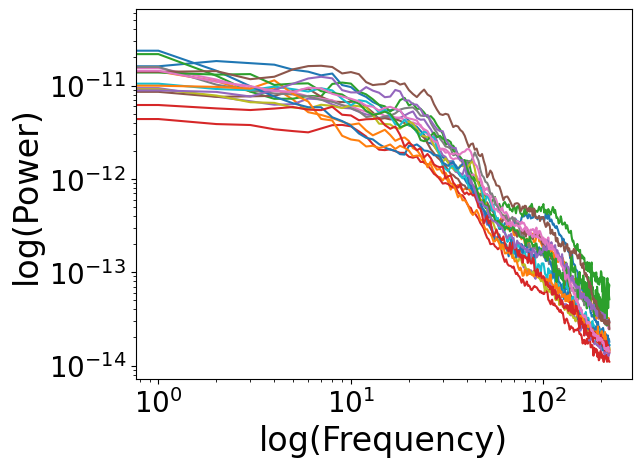

In [93]:
for i in range(17):
    X=lRM[i]
    plt.loglog(X)

plt.ylabel('log(Power)', fontsize=24)
plt.xlabel('log(Frequency)', fontsize=24)    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Single_subj_rem.svg')

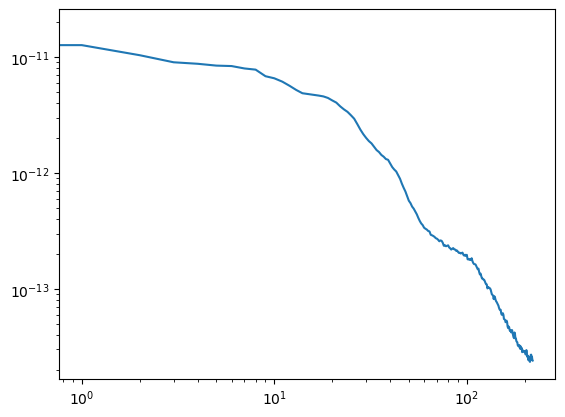

In [85]:
plt.loglog(np.mean(lRM,axis=0))